In [21]:
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import plotnine
from plotnine import *
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/olympic.csv' #raw github link
df=pd.read_csv(url)
df.head()

,m100,long,poid,haut,m400,m110,disq,perc,jave,m1500,score
0,-11.25,7.43,15.48,2.27,-48.90,-15.13,49.28,4.7,61.32,-268.95,8488
1,-10.87,7.45,14.97,1.97,-47.71,-14.46,44.36,5.1,61.76,-273.02,8399
2,-11.18,7.44,14.20,1.97,-48.29,-14.81,43.66,5.2,64.16,-263.20,8328
3,-10.62,7.38,15.02,2.03,-49.06,-14.72,44.80,4.9,64.04,-285.11,8306
4,-11.02,7.43,12.92,1.97,-47.44,-14.40,41.20,5.2,57.46,-256.64,8286


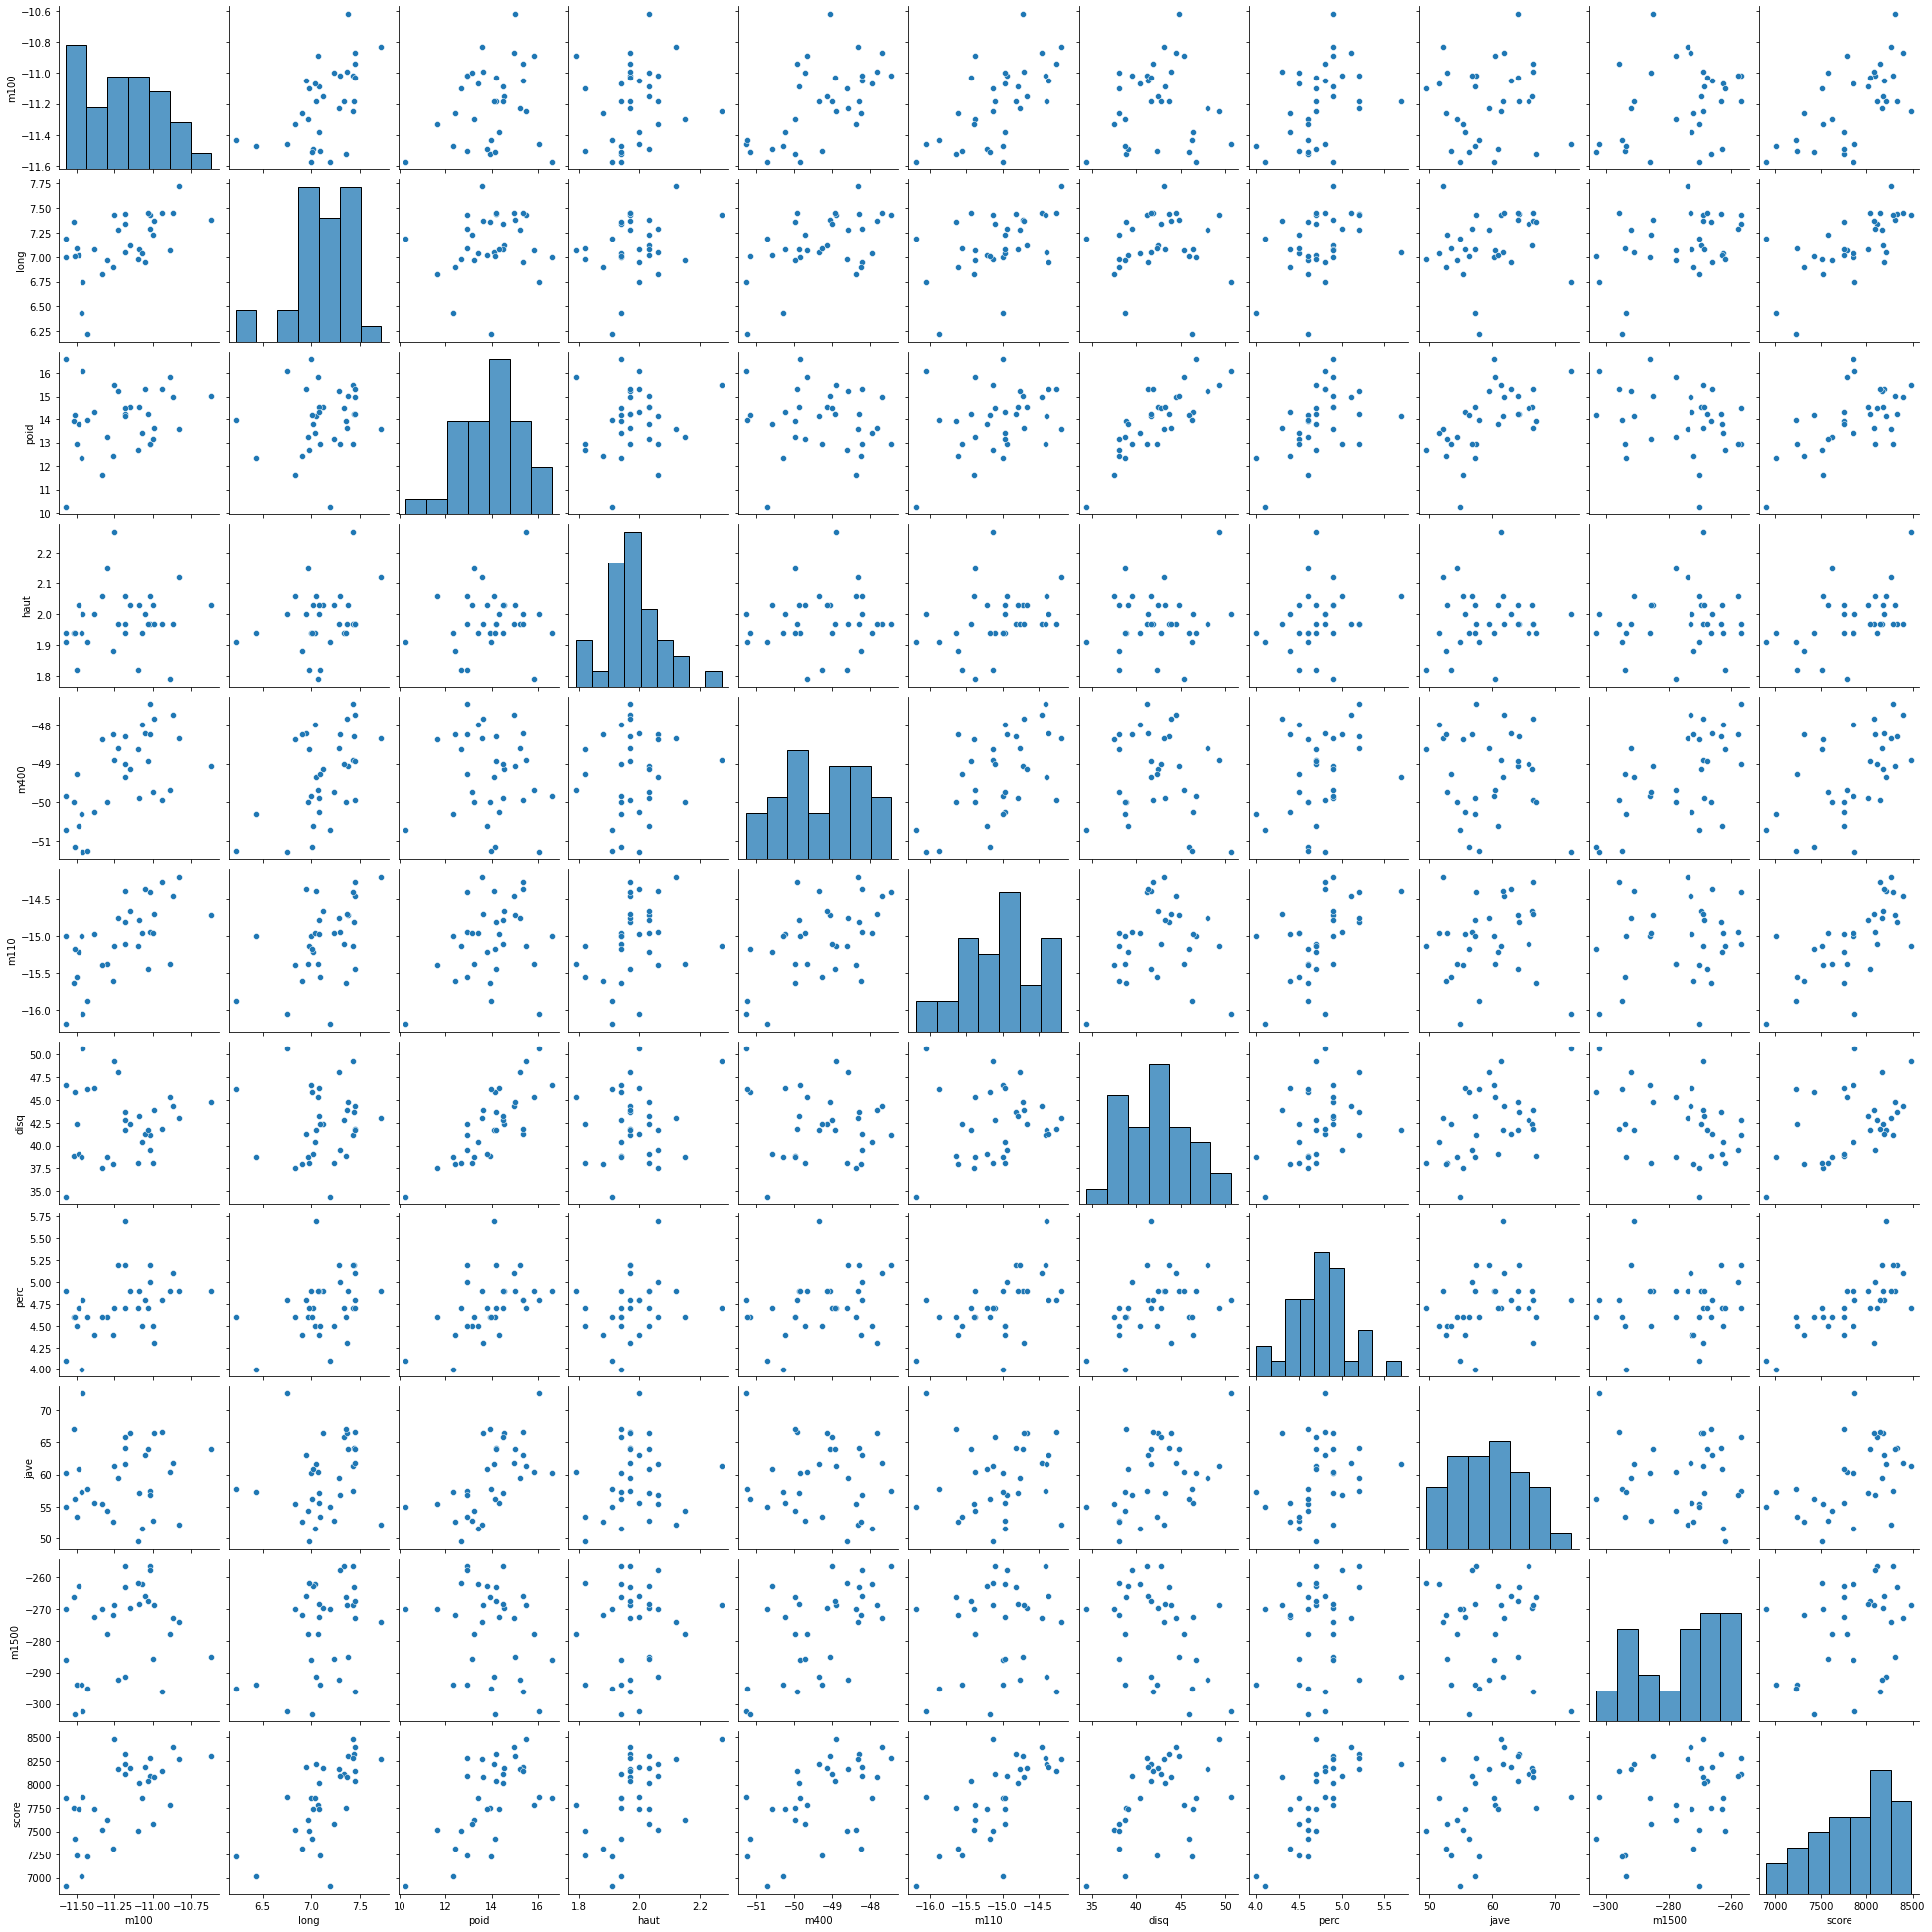

In [3]:
sns.pairplot(df)

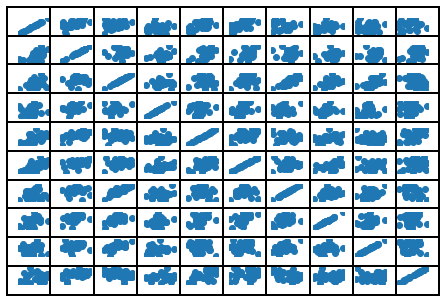

In [4]:
#with for loop scatters
olympic_array=np.array(df.loc[:, 'm100':'m1500'])
num_var=olympic_array.shape[1]

fig, axs = plt.subplots(num_var, num_var)

for i in range(num_var):
    for j in range(num_var):
        axs[i, j].scatter(olympic_array[:, i], olympic_array[:, j])
        axs[i, j].axis('off')
        rect = plt.Rectangle((0.1*i, 0.1*j), 0.10, 0.10, fill=False, color="k", lw=2, zorder=1000, transform=fig.transFigure, figure=fig)
        fig.patches.extend([rect])

plt.tight_layout()
plt.show()

In [5]:
#PCA
X=df.loc[:, 'm100':'m1500']
y=df.loc[:, 'score']

# scale data and fit pca
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca_model = PCA()
x_new = pca_model.fit_transform(X)

In [6]:
def scree_plot(pca_model):
    PC_values = np.arange(pca_model.n_components_) + 1
    plt.plot(PC_values, pca_model.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of Variance Explained')
    return()

In [7]:
def biplot_func(score, pca_model, labels=None, y=None, show_index=False):
    coeff=np.transpose(pca_model.components_[0:2, :]).copy()
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    coeff[:, 0] = coeff[:,0]*xs.std()*np.sqrt(len(xs))
    coeff[:, 1] = coeff[:,1]*ys.std()*np.sqrt(len(ys))
    fig, ax = plt.subplots()
    im = ax.scatter(xs, ys, c = y) #use y as color
    if show_index:
        for i in range(len(xs)):
            ax.text(xs[i], ys[i], i+1)
    if not y is None:
        fig.colorbar(im, ax=ax)
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(1.1*coeff[i,0], 1.1*coeff[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(1.1*coeff[i,0], 1.1*coeff[i,1], labels[i], color = 'g', ha = 'center', va = 'center')           
    ax.set_xlim(1.2*min(np.min(coeff[:, 0]), np.min(xs)), 1.2*max(np.max(coeff[:, 0]), np.max(xs)))
    ax.set_ylim(1.2*min(np.min(coeff[:, 1]), np.min(ys)), 1.2*max(np.max(coeff[:, 1]), np.max(ys)))
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    ax.grid()
    return(fig, ax)

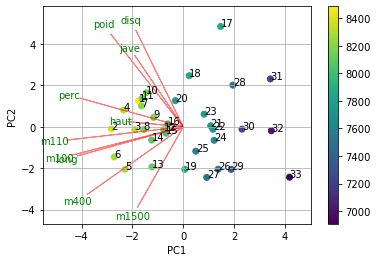

In [8]:
#Call the function with 2 pcs
[fig, ax] = biplot_func(x_new[:, 0:2], pca_model, labels=df.loc[:, 'm100':'m1500'].columns, y=df['score'], show_index=True)

In [9]:
y=df['score']
y

0     8488
1     8399
2     8328
3     8306
4     8286
5     8272
6     8216
7     8189
8     8180
9     8167
10    8143
11    8114
12    8093
13    8083
14    8036
15    8021
16    7869
17    7860
18    7859
19    7781
20    7753
21    7745
22    7743
23    7623
24    7579
25    7517
26    7505
27    7422
28    7310
29    7237
30    7231
31    7016
32    6907
Name: score, dtype: int64

In [10]:
#scores figure
def scores_plot(x_new, y):
    fig, ax = plt.subplots()
    pos1=x_new[:, 0]
    pos2=x_new[:, 1]
    color_score=np.zeros((len(pos1)), )
    for i in range(len(pos1)):
        color_score[i]=(y[i]-min(y))/(max(y)-min(y))
        ax.text(pos1[i], pos2[i], s=y[i])
    ax.scatter(pos1, pos2, c=color_score, cmap='hot')
    return(fig, ax)

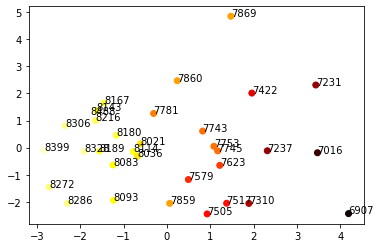

In [11]:
[fig, ax] = scores_plot(x_new, df['score'])

()

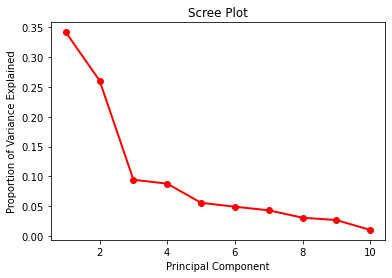

In [12]:
scree_plot(pca_model)

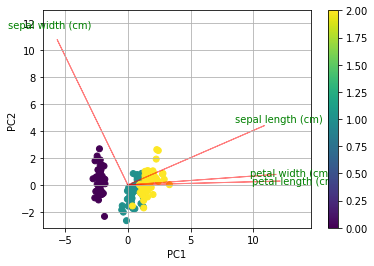

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# normalise and fit
scaler.fit(X)
X=scaler.transform(X)    
pca_model = PCA()
x_new = pca_model.fit_transform(X)

#Call the function. Use only the 2 PCs.
[fig, ax] = biplot_func(x_new[:, 0:2], pca_model, y=y, labels= iris.feature_names, show_index=False)

()

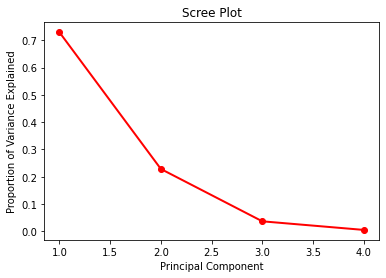

In [14]:
scree_plot(pca_model)

## t-SNE

In [37]:
# inlezen data
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/iris.csv'

df = pd.read_csv(url, sep = ";")
df.head()

,sepal length,sepal width,petal length,petal width,soort
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
X=np.array(df.loc[:, 'sepal length':'petal width']) #selecteer numerieke data
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(X)

In [39]:
#omvormen naar dataframe
df_tsne=pd.DataFrame()
df_tsne['Dim1']=points[:, 0] #kolom 1
df_tsne['Dim2']=points[:, 1] #kolom 2
df_tsne['Soort']=df['soort'] #soort

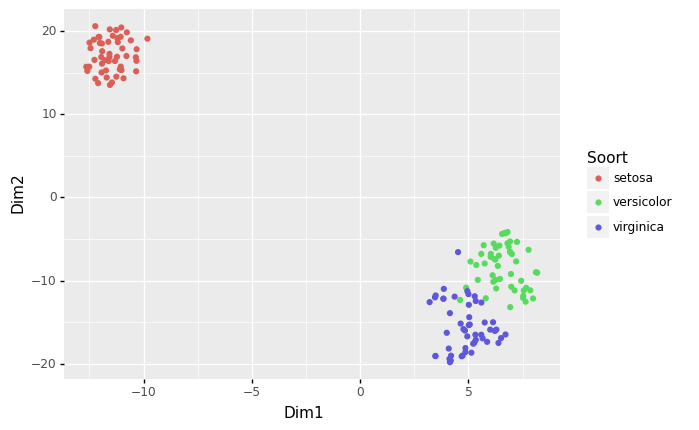

<ggplot: (-9223371947334077640)>

In [40]:
#met plotnine
(
ggplot(aes(x='Dim1', y='Dim2'), data=df_tsne)
+ geom_point(aes(color='Soort'))
)

## UMAP

In de onderstaande sectie wordt het gebruik van UMAP (Uniform Manifold Approximation and Projection) geillustreerd. UMAP is een 'manifold learning technique', net zoals MDS. UMAP is een niet-lineaire techniek die over het algemeen goed is in het leren van een locale *en* een globale structuur tegelijk. De computatietijd van UMAP schaalt beter voor grote datasets in vergelijking met MDS. In tegenstelling tot MDS wordt een UMAP altijd rechtstreeks op de dataset uitgevoerd (er kan dus geen gebruik gemaakt worden van een afstandsmatrix).

We maken gebruik van de Iris dataset vanuit de voorgaande oefeningen. Op basis van de UMAP technieken zullen we proberen om de verschillende soorten van elkaar te onderscheiden op basis van de lengte en breedte van de sepalen en petalen.

**Stap 1: inladen UMAP en dataset**

In [15]:
!pip install umap-learn
#er is een andere module met dezelfde naam, dus je moet op deze manier importeren:
import umap.umap_ as umap 

# inlezen data
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/iris.csv'

df = pd.read_csv(url, sep = ";")
df.head()

You should consider upgrading via the 'c:\users\adloose\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


,sepal length,sepal width,petal length,petal width,soort
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Stap 2: fit een reducer op de data (cfr. PCA)**

In [16]:
#via random_state kan je ervoor zorgen dat je 
#altijd hetzelfde resultaat krijgt als je de code opnieuw loopt
iris_array=np.array(df.loc[:, 'sepal length':'petal width']) #selecteer numerieke data
reducer = umap.UMAP(random_state=9000) 
reducer.fit(iris_array)

UMAP(random_state=9000, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

**Stap 3: gebruik de reduceren om de data te transformeren naar 2D coordinaten**

In [17]:
embedding = reducer.transform(iris_array)

#omvormen naar dataframe
df_umap=pd.DataFrame()
df_umap['Dim1']=embedding[:, 0] #kolom 1
df_umap['Dim2']=embedding[:, 1] #kolom 2
df_umap['Soort']=df['soort'] #soort

**Stap 4: plot de nieuwe coordinaten**

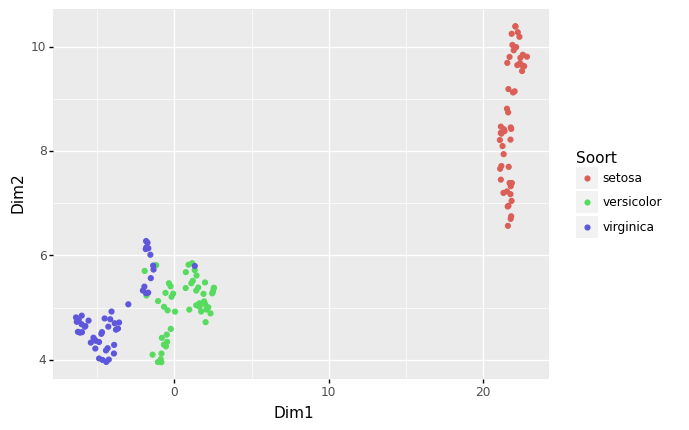

<ggplot: (-9223371947343866016)>

In [22]:
#met plotnine
(
ggplot(aes(x='Dim1', y='Dim2'), data=df_umap)
+ geom_point(aes(color='Soort'))
)

## Extra: UMAP op digits dataset

**Inladen**

In [23]:
#laad de digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

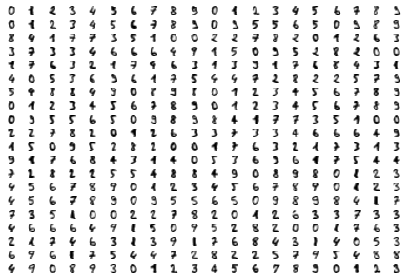

In [24]:
#illustratie data
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

**reducer**

In [25]:
reducer = umap.UMAP(random_state=9000) 
reducer.fit(digits.data)

UMAP(random_state=9000, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

**embedding**

In [26]:
embedding = reducer.transform(digits.data)
#hoe ziet de data eruit?
embedding.shape

(1797, 2)

In [27]:
#omvormen naar dataframe
df_umap=pd.DataFrame()
df_umap['Dim1']=embedding[:, 0] #kolom 1
df_umap['Dim2']=embedding[:, 1] #kolom 2
df_umap['Getal']=digits.target #getal

**plot**

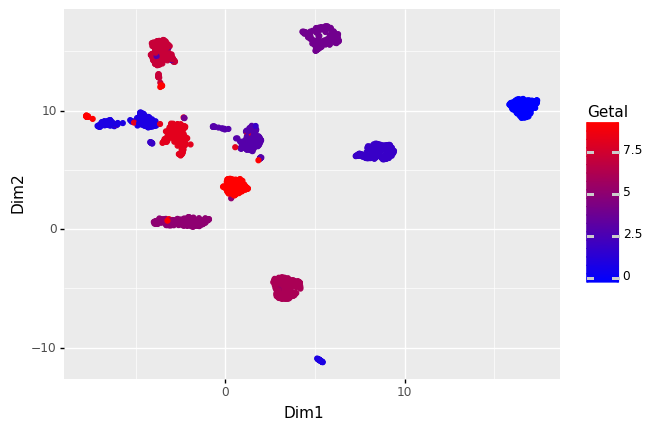

<ggplot: (-9223371947334581444)>

In [28]:
#met plotnine
(
ggplot(aes(x='Dim1', y='Dim2'), data=df_umap)
+ geom_point(aes(color='Getal'))
+ scale_color_gradient(low='blue', high='red')
)

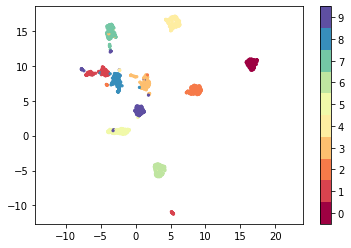

In [29]:
#met matplotlib
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))